In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [99]:
#1) O segundo coeficiente de virial do N2 foi determinado para o seguinte 
#   conjunto de temperaturas:
dados = {'t':[75,100,125,150,200,250,300,400,500,600,700],
        'B':[-274,-160,-104,-71.5,-35.2,-16.2,-4.2,9.0,16.9,21.3,24]}
#a)Ajuste estes dados a função : B= Alfa + Beta*T + Gama*T^2 + Teta*T^3
data = pd.DataFrame(dados)
data

,t,B
0,75,-274.0
1,100,-160.0
2,125,-104.0
3,150,-71.5
4,200,-35.2
5,250,-16.2
6,300,-4.2
7,400,9.0
8,500,16.9
9,600,21.3


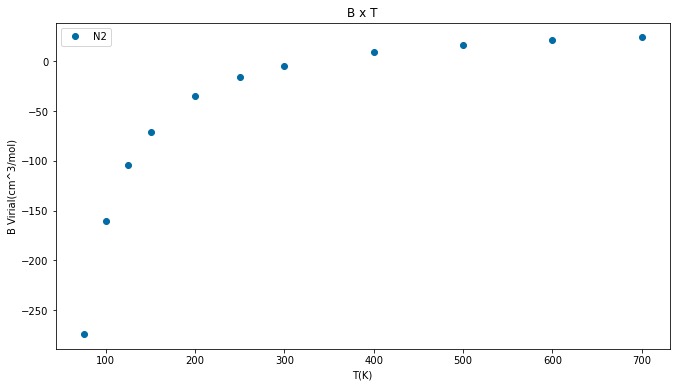

In [100]:
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(dados['t'],dados['B'],'o',label = 'N2')
plt.xlabel('T(K)')
plt.ylabel('B Virial(cm^3/mol)')
plt.title('B x T')
plt.legend()

In [101]:
mod_linear = np.polyfit(dados['t'],dados['B'],deg = 3)   #deg de degree é o grau em que o polinomio sera ajustado 
mod_linear

array([ 5.00971892e-06, -7.05078315e-03,  3.13948634e+00, -4.25692166e+02])

In [102]:
Teta = mod_linear[0]
Gama = mod_linear[1]
Beta = mod_linear[2]
Alfa = mod_linear[3]


In [103]:
t = np.array(dados['t'])
forma = PolynomialFeatures(degree=3)
t = t.reshape(-1,1)
t_polinomial_3 = forma.fit_transform(t)
modelo3 = LinearRegression()
modelo3.fit(t_polinomial_3,dados['B'])
B_polinomial_3 = modelo3.predict(t_polinomial_3)
r2 = r2_score(dados['B'],B_polinomial_3)

In [104]:
residual = (dados['B'] - B_polinomial_3)
min_residual = residual.min()
median_residual = np.median(residual)
max_residual = residual.max()

In [105]:
def f_modelo(x,mod_linear):
    Teta = mod_linear[0]
    Gama = mod_linear[1]
    Beta = mod_linear[2]
    Alfa = mod_linear[3]
    return Alfa + Beta*x + Gama*x**2 + Teta*x**3

In [106]:
t_graf = np.linspace(75,700,1000)
f_modelo(t_graf,mod_linear)
B_graf = f_modelo(t_graf,mod_linear)

Sumário:
Teta = 0.000005
Gama = -0.007051
Beta = 3.139486
Alfa = -425.692166
Coeficiente de determinação(R^2) = 0.938812

Residuais:
Mínimo residual = -46.222130
Mediana residual = 4.548472
Máximo residual = 29.640252


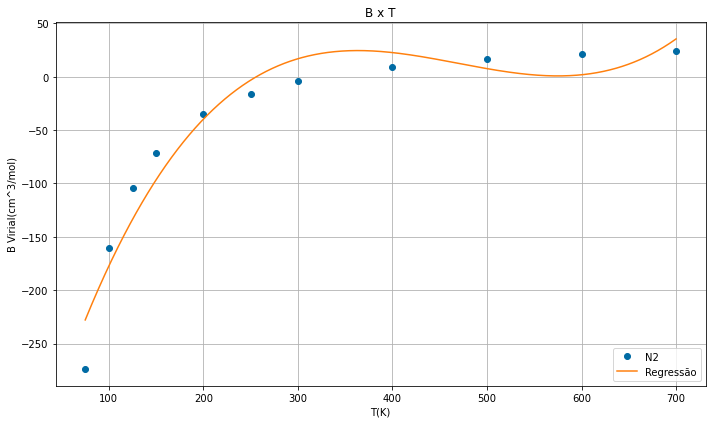

In [107]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dados['t'], dados['B'],'o',label = 'N2')
ax.plot(t_graf,B_graf,label = 'Regressão')
ax.legend(loc = 'lower right')
plt.xlabel('T(K)')
plt.ylabel('B Virial(cm^3/mol)')
plt.title('B x T')
plt.grid()
fig.tight_layout()

print('Sumário:')
print(f"Teta = {Teta:6.6f}")
print(f"Gama = {Gama:6.6f}")
print(f"Beta = {Beta:6.6f}")
print(f"Alfa = {Alfa:6.6f}")
print(f"Coeficiente de determinação(R^2) = {r2:6.6f}") 
print()
print('Residuais:')
print(f"Mínimo residual = {min_residual:6.6f}" )
print(f"Mediana residual = {median_residual:6.6f}" )
print(f"Máximo residual = {max_residual:6.6f}" )

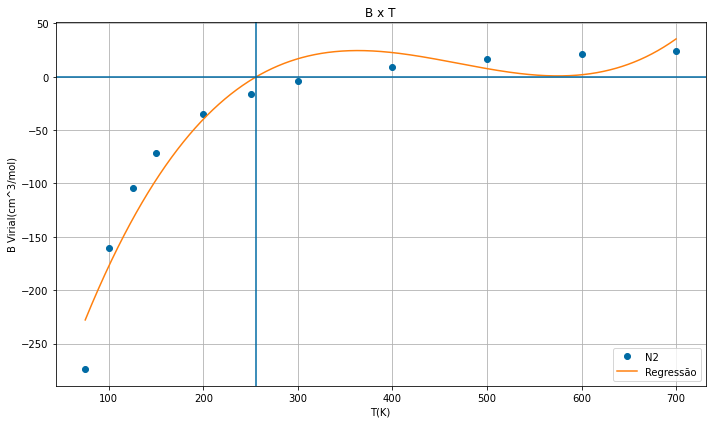

In [108]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dados['t'], dados['B'],'o',label = 'N2')
ax.plot(t_graf,B_graf,label = 'Regressão')
ax.legend(loc = 'lower right')
plt.xlabel('T(K)')
plt.ylabel('B Virial(cm^3/mol)')
plt.title('B x T')
plt.grid()
fig.tight_layout()
plt.axvline(256.0285)
plt.axhline(0)

In [109]:
f_modelo(256.0285,mod_linear)   #mais preciso que no R 
                                #precisao parecida com o Auto Newton Rapshon 2.0 

8.898380045252452e-06